<p style = "color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Université de Bordeaux</span>
<span style="width:49%; display:inline-block; text-align:right">Mamadou DIALLO</span>
<span style="font-size:30px; font-style:normal"><b>PROJET : Analyse des données de gapminder</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">M1 </span>
<span style="width:49%; display:inline-block; text-align:right">Groupe 3</span></p>

L'objetif de cet projet est de faire une analyse sur les données de **gampminder**, pour le faire ils nous 
faut des outils statistiques et de mettre en oeuvre quelques unes des fonctionnalités fournies par le package **pandas**.
Pour afficher les données, on mettra en oeuvre la bibliothèque **seaborn**, et de **matplotlib** spécialisée pour les figures liées à l'analyse statistiques des données. 


In [2]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd # import du package 'pandas' avec alias 'pd'
import seaborn as sb # import du package 'seaborn' avec alias 'sb'
sb.set_style('ticks')

<h2 style="padding:16px; color:white; background:#07D">chargement des données</h2>
On fournit un fichier json  **gagminder.json**  contenant des informations des pays du monde à chaque 5 ans des années antérieure depuis 1952 jusqu'à 2007. 

#### Lien

 [lien pour  voir les données](https://cdn.jsdelivr.net/gh/timruffles/gapminder-data-json@74aee1c2878e92608a6219c27986e7cd96154482/gapminder.min.json) 


In [3]:
#p2data = "https://cdn.jsdelivr.net/gh/timruffles/gapminder-data-json@74aee1c2878e92608a6219c27986e7cd96154482/gapminder.min.json"
gap = pd.read_json("gapminder.min.json")
gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Avant de manipuler un dataset, il est indispensable d'analyser sa structure 

In [49]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


Quelques statistiques sur gap 

In [50]:
gap.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


<h2 style="padding:16px; color:white; background:#07D">chargement des données</h2>
On vas extraire uniquement les données qui concerne celle de l'année 2007

In [5]:
gap_2007=gap[gap.year==2007]
gap_2007

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593


<h2 style="padding:16px; color:white; background:#07D">transformation de gdpPercap en varioables catégorielle (ordinale)</h2>
coupures de la variables gdpPercap

In [6]:
coupures=gap_2007.gdpPercap.quantile([0,.2,.4,.6,.8,1])
coupures

0.0      277.551859
0.2     1340.337886
0.4     3881.320413
0.6     9494.899975
0.8    23245.173486
1.0    49357.190170
Name: gdpPercap, dtype: float64

affichage  des valeurs pour tous les pays

In [7]:
pd.cut(gap_2007.gdpPercap,coupures, 
    labels=["Très faible", "Faible", "Moyen","Fort","Très fort"])

11      Très faible
23            Moyen
35            Moyen
47            Moyen
59             Fort
           ...     
1655         Faible
1667         Faible
1679         Faible
1691    Très faible
1703    Très faible
Name: gdpPercap, Length: 142, dtype: category
Categories (5, object): ['Très faible' < 'Faible' < 'Moyen' < 'Fort' < 'Très fort']

création de la variable PIB en catégorie

In [8]:
gap_2007['niveauPIB'] = pd.cut(gap_2007.gdpPercap,coupures, 
                               labels=["Très faible", "Faible", "Moyen","Fort","Très fort"])

gap_2007

C:\Users\hp\AppData\Local\Temp\ipykernel_16048\1789216786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_2007['niveauPIB'] = pd.cut(gap_2007.gdpPercap,coupures,


,country,continent,year,lifeExp,pop,gdpPercap,niveauPIB
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,Très faible
23,Albania,Europe,2007,76.423,3600523,5937.029526,Moyen
35,Algeria,Africa,2007,72.301,33333216,6223.367465,Moyen
47,Angola,Africa,2007,42.731,12420476,4797.231267,Moyen
59,Argentina,Americas,2007,75.320,40301927,12779.379640,Fort
...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,Faible
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,Faible
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,Faible
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,Très faible


**Table de contingence pour croiser 2 variables qualitatives** pour voire combient il y a de pays qui à un niveauPIB *`trés faibles`*, *`Faible`*, *`Moyen`*,*`Fort`* et *`Très fort`* dans chaque contient en 2007

In [9]:
tableau = pd.crosstab(gap_2007.niveauPIB ,gap_2007.continent)
tableau

continent,Africa,Americas,Asia,Europe,Oceania
niveauPIB,,,,,
Très faible,24,1,3,0,0
Faible,14,3,11,0,0
Moyen,8,10,6,4,0
Fort,5,9,5,9,0
Très fort,0,2,8,17,2


**barplot pour représenter le tableau contingence**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Oceania')])

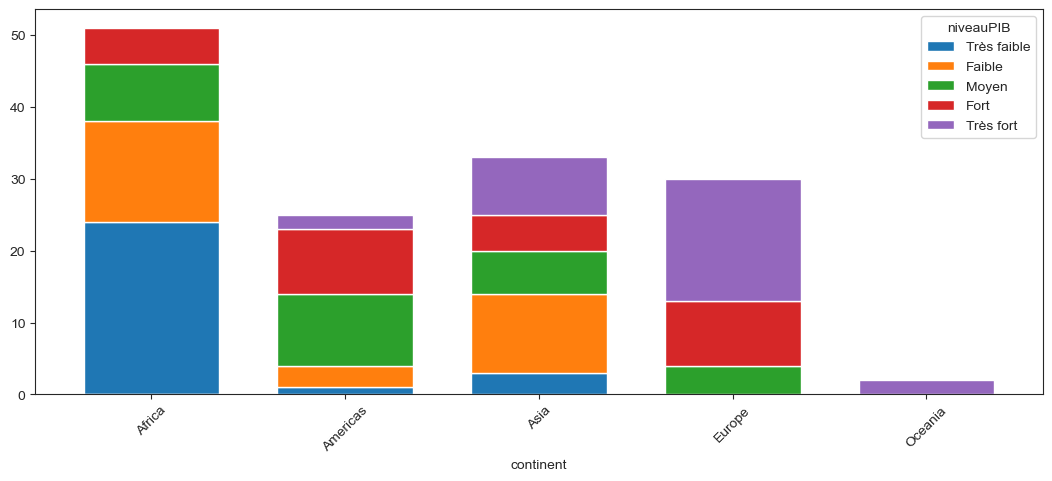

In [10]:
tableau.T.plot(kind='bar', stacked=True, figsize=(13,5), width=0.7); mp.xticks(rotation=45)

**Nuage des points** pour voir comment sont ddistribuer les pays entre les 2 variables 

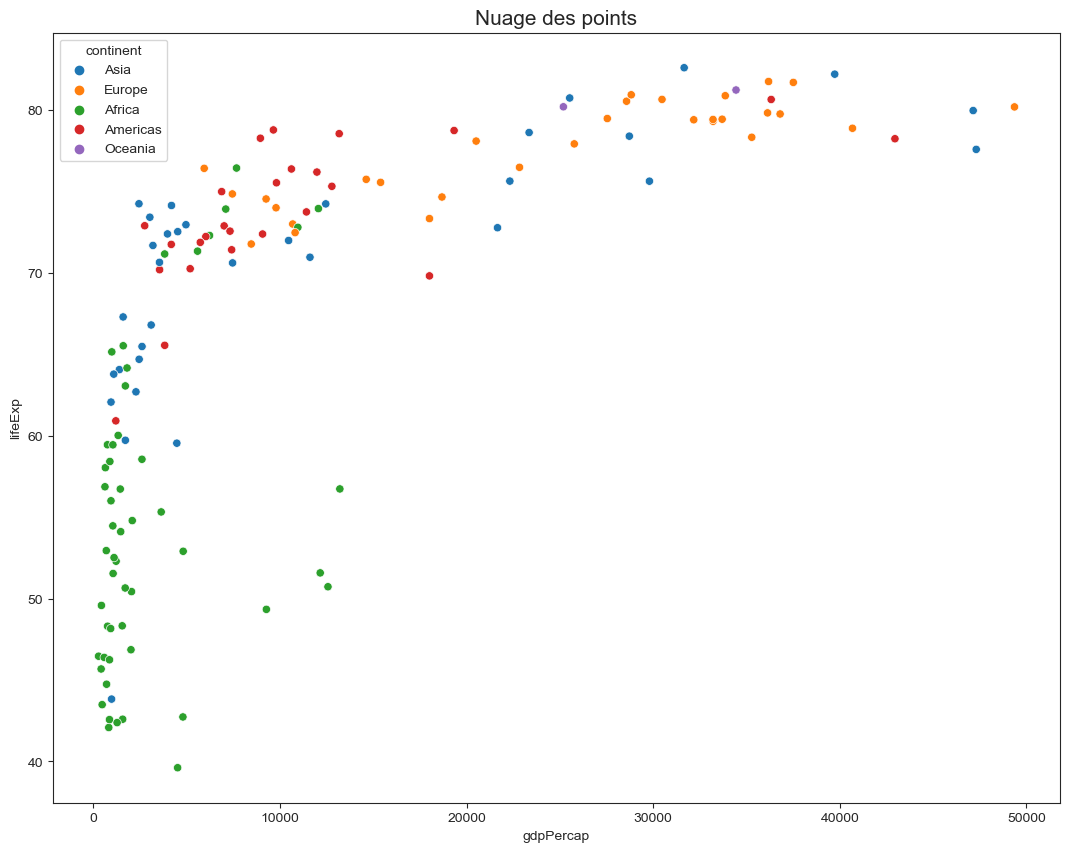

In [11]:
mp.figure(figsize=(13,10)); mp.title('Nuage des points', fontsize=15)
sb.scatterplot(data=gap_2007, x=gap_2007.gdpPercap, y=gap_2007.lifeExp, hue='continent'); 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


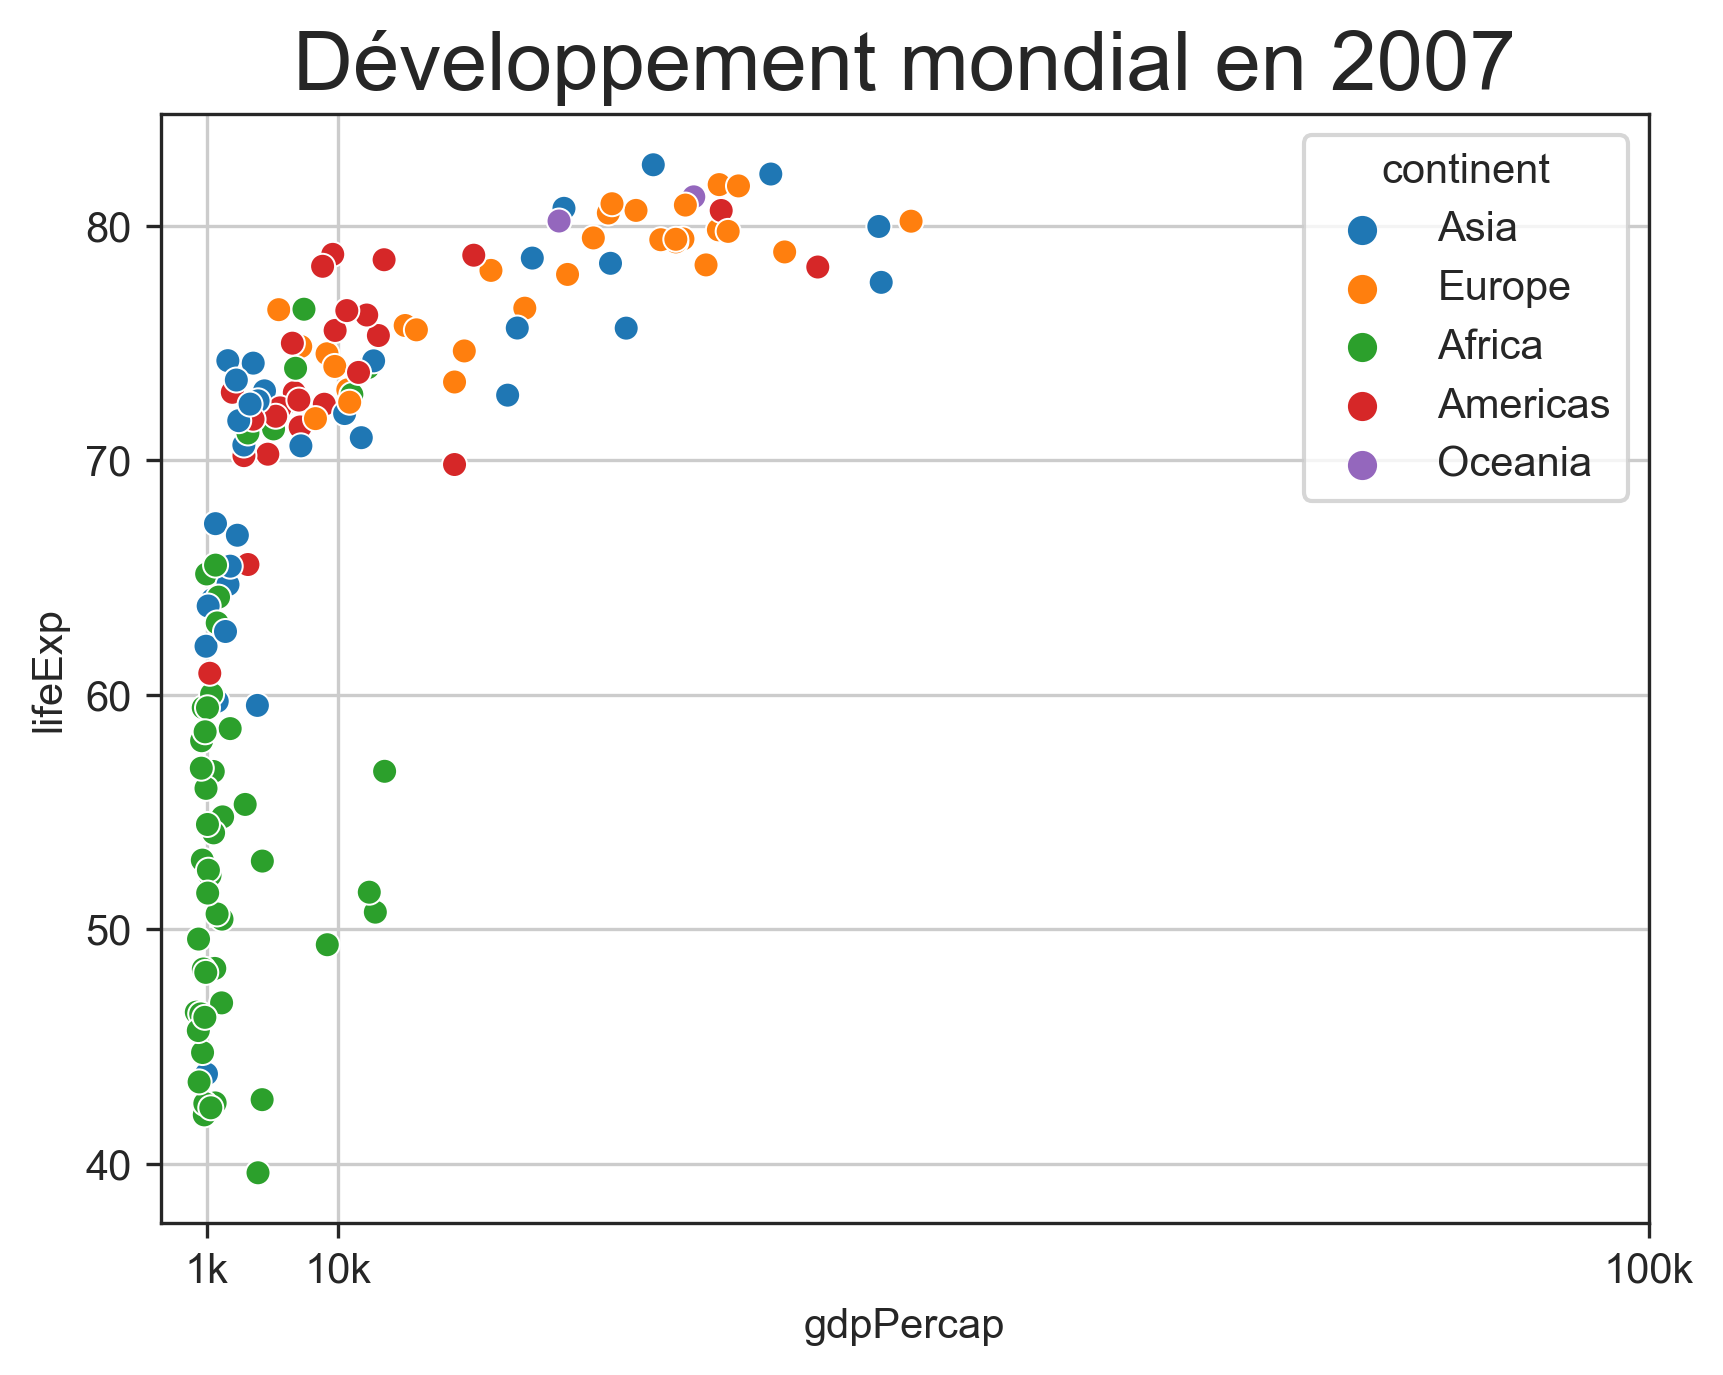

In [13]:
# Augmenter la taille du graphique
mp.figure(dpi=300)
sb.scatterplot(gap_2007['gdpPercap'], gap_2007['lifeExp'], hue = gap_2007['continent'], 
                 sizes=(20,400), legend = True)
mp.grid(True)
mp.title('Développement mondial en 2007', fontsize = 20)
mp.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
mp.show()

Il peut parfois être plus facile de comprendre les variations entre les groupes en les séparant explicitement en différents panels.

<Figure size 6400x4800 with 0 Axes>

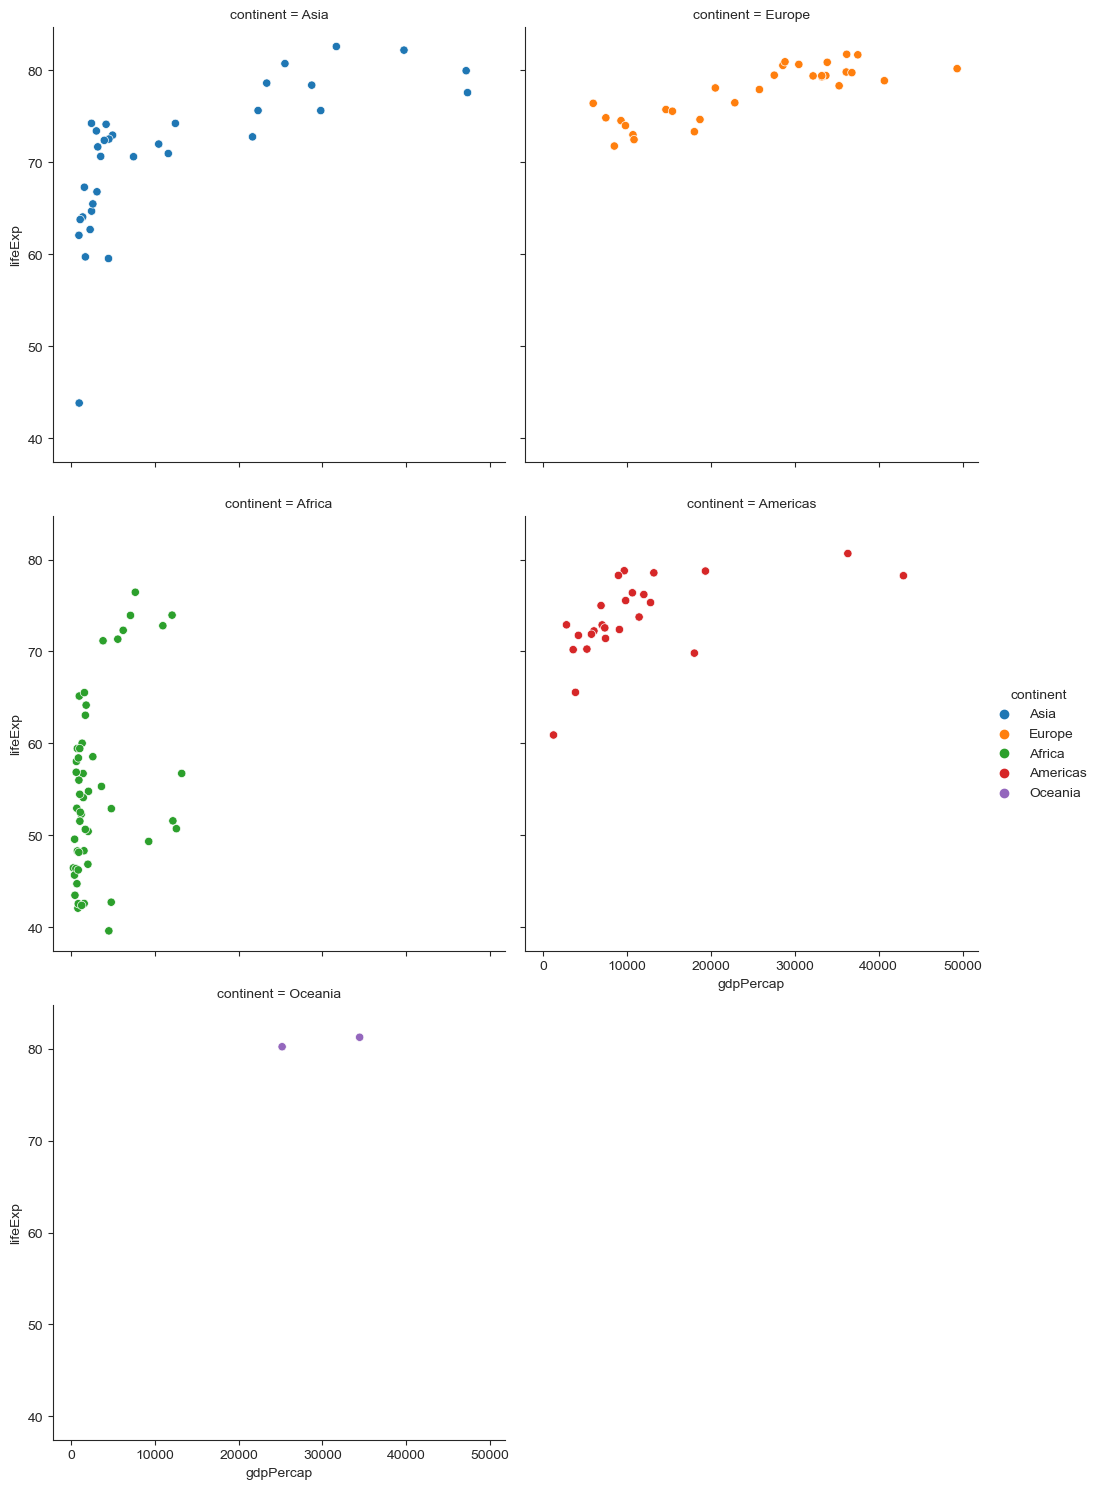

In [15]:
mp.figure(dpi=1000)
sb.relplot(x="gdpPercap", y="lifeExp", hue="continent", col="continent", col_wrap=2,
    data=gap_2007)


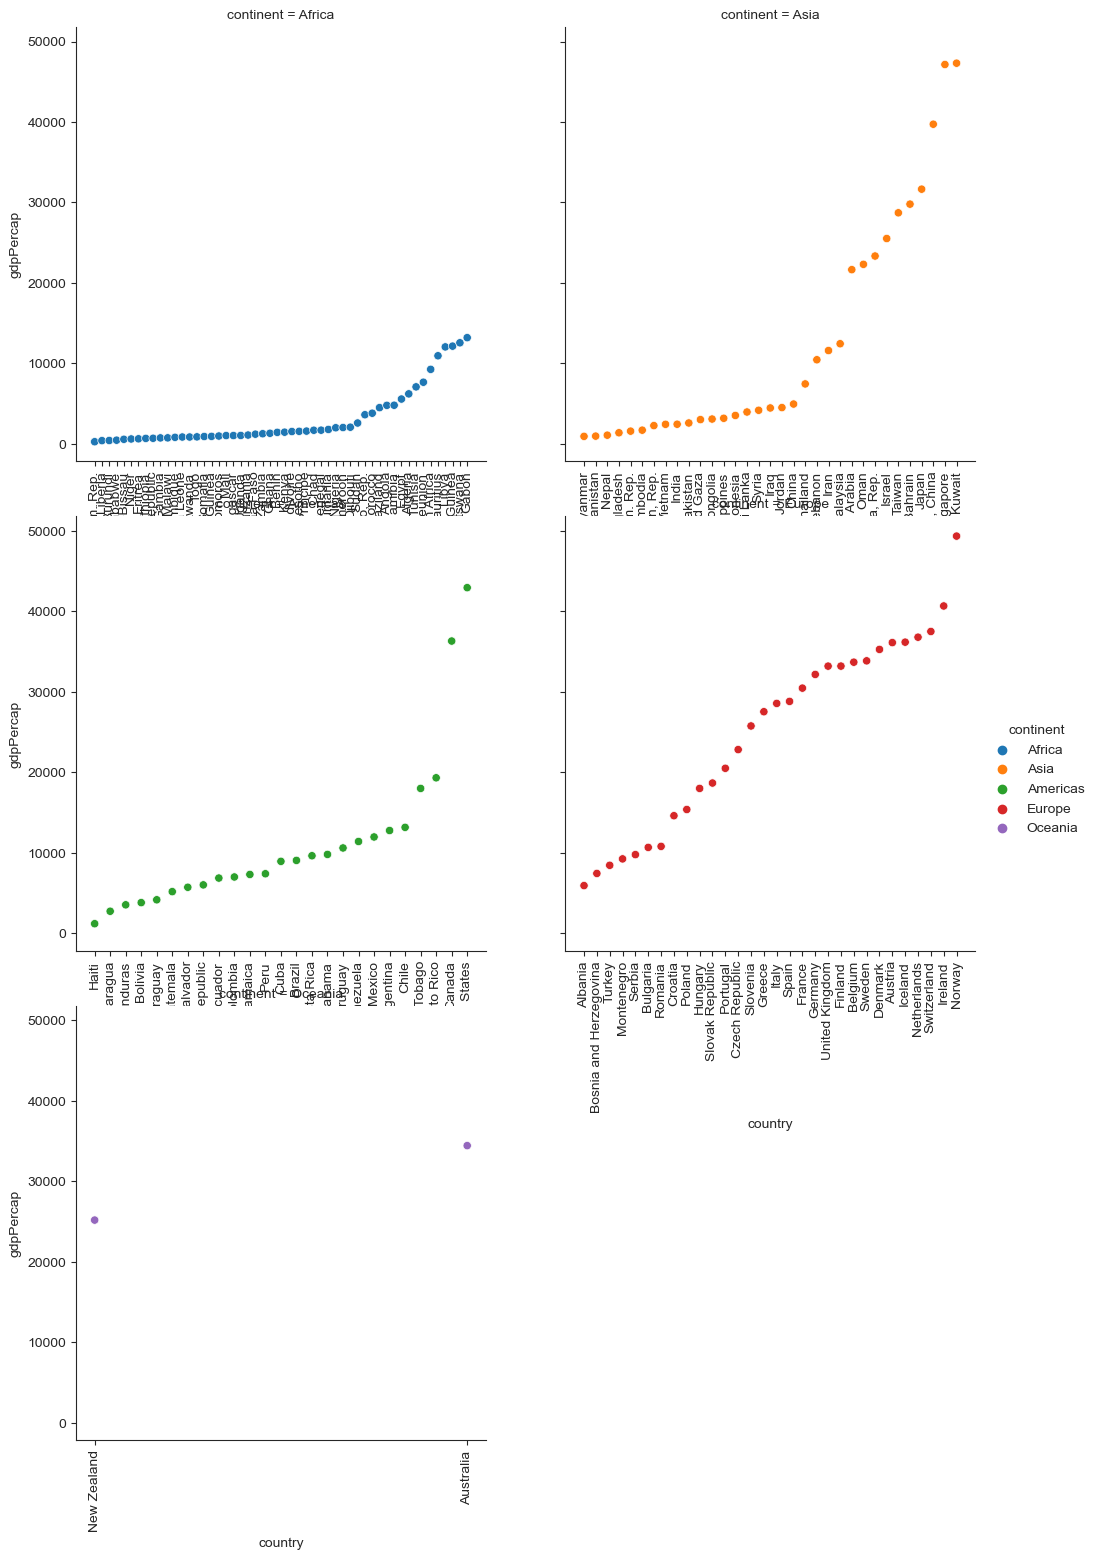

In [20]:
gap_2007 = gap_2007.sort_values("gdpPercap") 
plot = sb.relplot(
  x="country",
  y="gdpPercap",
  col="continent",
  hue="continent",
  col_wrap=2,
  facet_kws={"sharex": False},
  data=gap_2007
)
#pour rendre lisible l'axe x
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

Voyons comment une intrigue de violon peut communiquer les mêmes informations de manière beaucoup plus succincte

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


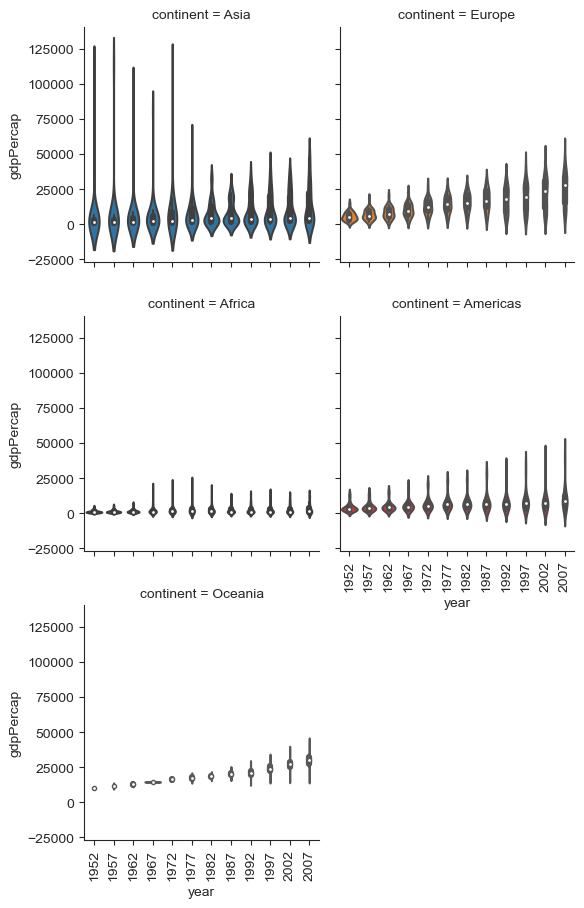

In [21]:
plot = sb.FacetGrid(gap, col="continent", hue="continent",col_wrap=2,)
plot.map(sb.violinplot, "year", "gdpPercap")
#pour rendre lisible l'axe x
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

**Animations** 

In [22]:
import plotly
import plotly.express as px


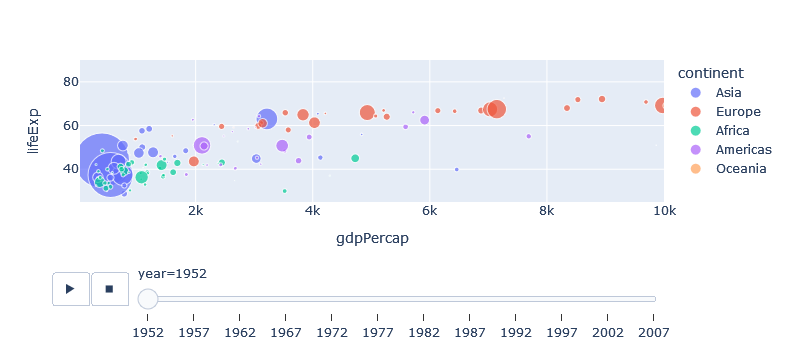

In [33]:
#mp.figure(figsize=(20,40))
px.scatter(gap, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=60, 
                hover_name='country',  animation_frame='year',
                 animation_group='country', range_x=[25, 10000], range_y=[25,90])


Représenter des données géographiques sous forme de cartes animées

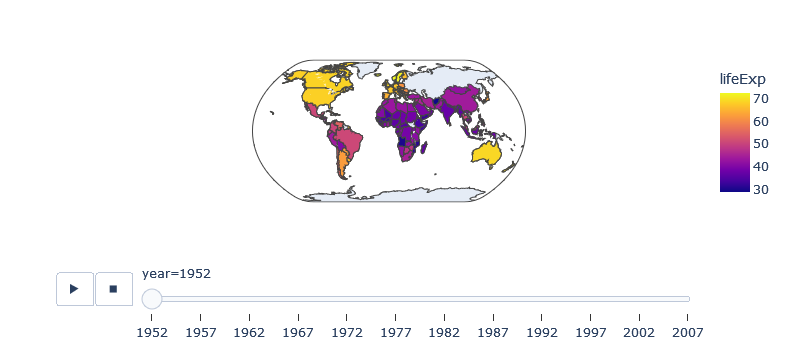

In [34]:
df0 = px.data.gapminder()
fig = px.choropleth(df0, locations='iso_alpha', color='lifeExp', hover_name='country', 
                    animation_frame='year', 
                    color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
fig.show()

Animation avec les barplot

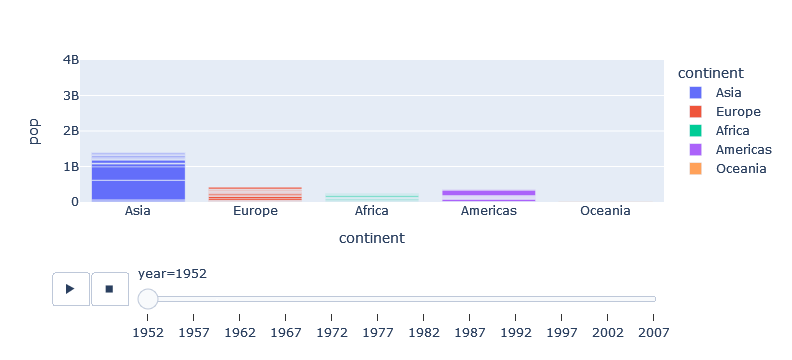

In [35]:

fig = px.bar(gap, x='continent', y='pop', color='continent',  
                hover_name='country',  animation_frame='year',
                  range_y=[25,4000000000])
fig.show()

Création d'un graphique linéaire pour les points de données de différentes catégories

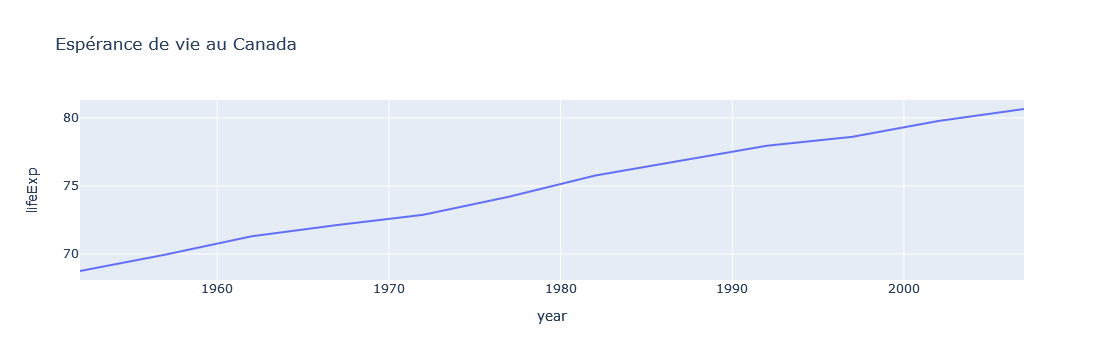

In [36]:
df = gap.query("country=='Guinea'")
fig = px.line(df, x='year', y='lifeExp', title='Espérance de vie au Canada')
fig.show()

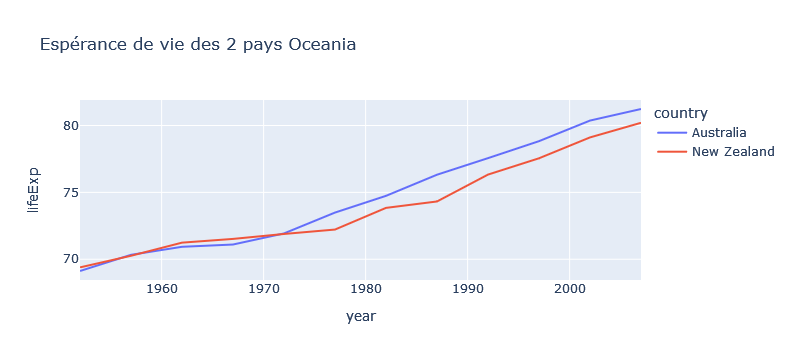

In [37]:
df1 = gap.query("continent=='Oceania'")
fig = px.line(df1, x='year', y='lifeExp', color='country',title='Espérance de vie des 2 pays Oceania' )
fig.show()

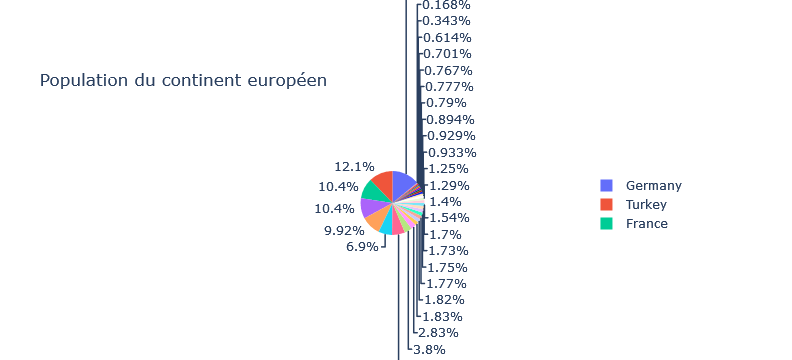

In [51]:
df2 = gap.query("year == 2007").query("continent == 'Europe'")
df2.loc[df2['pop'] < 2.e6, 'country'] = 'Autres pays' 
fig = px.pie(df2, values='pop', names='country', title='Population du continent européen')
fig.show()

**Boites a moustaches**

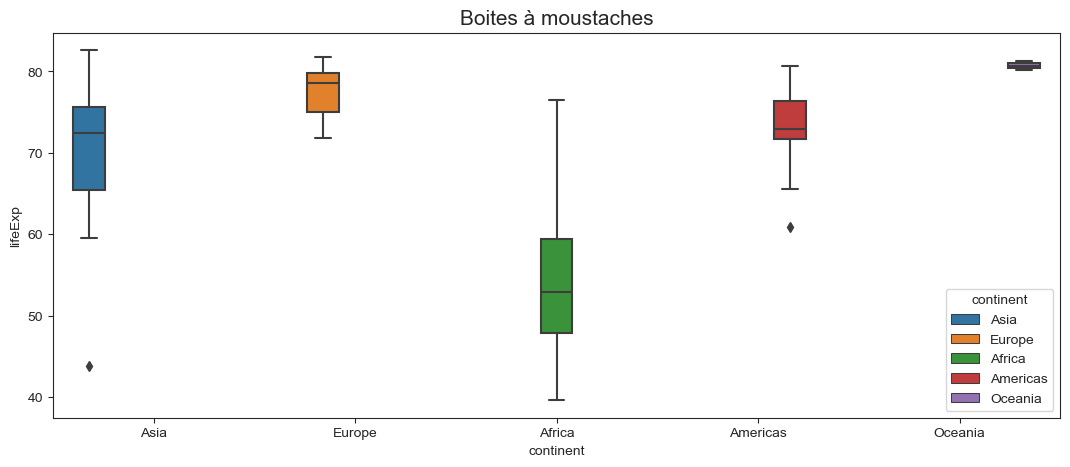

In [10]:
mp.figure(figsize=(13,5)); mp.title('Boites à moustaches', fontsize=15)
sb.boxplot(data=gap_2007, x=gap_2007.continent , y=gap_2007.lifeExp, hue='continent');


**Visualisations rapides avec des graphiques à barres** 

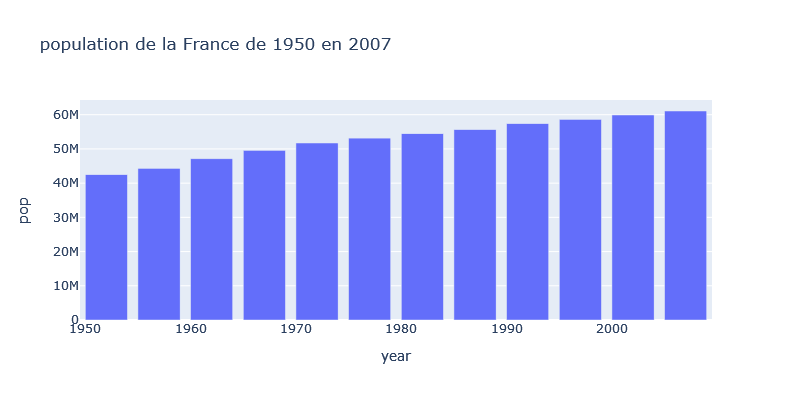

In [40]:
d = gap.query("country == 'France'")
fig = px.bar(d, x='year', y='pop', height=400,title=("population de la France de 1950 en 2007"))
fig.show()

**ajoutons de la couleur par lifeExp et d'autres paramètres**

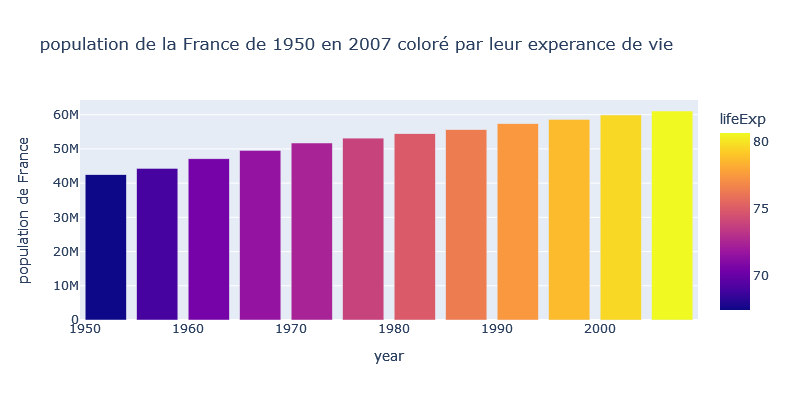

In [44]:
fig = px.bar(d, x='year', y='pop' , color='lifeExp',
            labels={'pop':'population de France'}, 
            title=("population de la France de 1950 en 2007 coloré par leur experance de vie"), 
            height=400)
fig.show()

Nous pouvons comparer les changements d'espérance de vie entre 1952 et 2007 en créant une visualisation avec deux histogrammes ou deux boîtes à moustaches

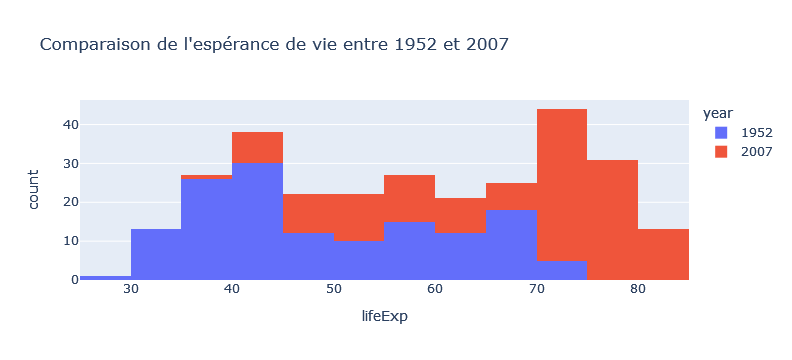

In [46]:
fig = px.histogram(
    gap.query("year == 1952 or year == 2007"),
    x="lifeExp",
    color="year",
    title="Comparaison de l'espérance de vie entre 1952 et 2007")
fig.show()


Nous pouvons voir que l'histogramme s'est déplacé de gauche à droite entre 1952 (couleur bleue) et 2007 (couleur rouge) indiquant que l'espérance de vie des personnes dans le monde a augmenté. Concrètement, en 1952, aucun pays n'a une espérance de vie supérieure à 75 ans et plus d'une dizaine de pays ont une espérance de vie inférieure à 35 ans. Mais en 2007, de nombreux pays ont une espérance de vie supérieure à 75 ans et aucun pays n'a une espérance de vie inférieure à 35 ans.

**Le peut faire la même chose pour la boîte à moustaches**

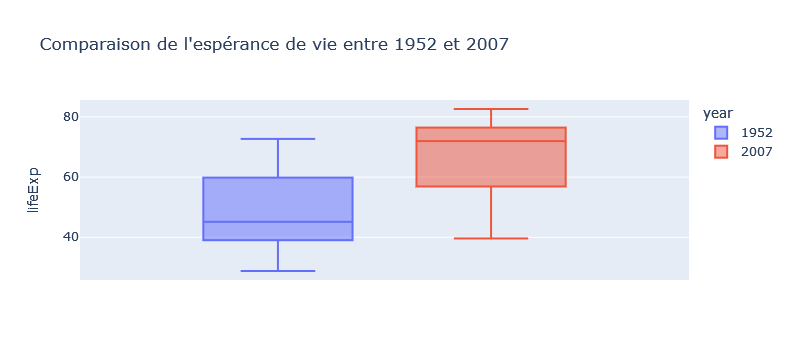

In [48]:
fig = px.box(
    gap.query("year == 1952 or year == 2007"),
    y="lifeExp",
    color="year",
    title="Comparaison de l'espérance de vie entre 1952 et 2007")
fig.show()
              

Si nous passons la souris dessus, nous verrons que l'espérance de vie médiane pour l'année 1952 était de 45 ans et pour l'année 2007 était de 72 ans. Les gens ont vécu beaucoup plus longtemps après un demi-siècle